<a href="https://colab.research.google.com/github/DanielCalimayor/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/Daniel_Calimayor_DS_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
import pandas as pd
import numpy as np

In [0]:
from google.colab import files
files.upload()

Saving crx.data to crx (4).data


{'crx.data': b'b,30.83,0,u,g,w,v,1.25,t,t,01,f,g,00202,0,+\na,58.67,4.46,u,g,q,h,3.04,t,t,06,f,g,00043,560,+\na,24.50,0.5,u,g,q,h,1.5,t,f,0,f,g,00280,824,+\nb,27.83,1.54,u,g,w,v,3.75,t,t,05,t,g,00100,3,+\nb,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+\nb,32.08,4,u,g,m,v,2.5,t,f,0,t,g,00360,0,+\nb,33.17,1.04,u,g,r,h,6.5,t,f,0,t,g,00164,31285,+\na,22.92,11.585,u,g,cc,v,0.04,t,f,0,f,g,00080,1349,+\nb,54.42,0.5,y,p,k,h,3.96,t,f,0,f,g,00180,314,+\nb,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+\nb,22.08,0.83,u,g,c,h,2.165,f,f,0,t,g,00128,0,+\nb,29.92,1.835,u,g,c,h,4.335,t,f,0,f,g,00260,200,+\na,38.25,6,u,g,k,v,1,t,f,0,t,g,00000,0,+\nb,48.08,6.04,u,g,k,v,0.04,f,f,0,f,g,00000,2690,+\na,45.83,10.5,u,g,q,v,5,t,t,07,t,g,00000,0,+\nb,36.67,4.415,y,p,k,v,0.25,t,t,10,t,g,00320,0,+\nb,28.25,0.875,u,g,m,v,0.96,t,t,03,t,g,00396,0,+\na,23.25,5.875,u,g,q,v,3.17,t,t,10,f,g,00120,245,+\nb,21.83,0.25,u,g,d,h,0.665,t,f,0,t,g,00000,0,+\na,19.17,8.585,u,g,cc,h,0.75,t,t,07,f,g,00096,0,+\nb,25.00,11.25,u,g,c

In [0]:
df = pd.read_csv('crx.data')
df.head(13)

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
5,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
6,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
7,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
8,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+
9,b,22.08,0.830,u,g,c,h,2.165,f,f,0,t,g,00128,0,+


In [0]:
df.dtypes

b         object
30.83     object
0        float64
u         object
g         object
w         object
v         object
1.25     float64
t         object
t.1       object
01         int64
f         object
g.1       object
00202     object
0.1        int64
+         object
dtype: object

In [0]:
df.isnull().values.any()

False

In [0]:
df['30.83'].replace('?', np.NaN, inplace = True)

In [0]:
df.replace({'30.83': {'?': np.nan}}, regex=False,inplace=True)
df.isnull().sum()

b         0
30.83    12
0         0
u         0
g         0
w         0
v         0
1.25      0
t         0
t.1       0
01        0
f         0
g.1       0
00202    13
0.1       0
+         0
dtype: int64

In [0]:
df['30.83'].astype(float)

0      58.67
1      24.50
2      27.83
3      20.17
4      32.08
5      33.17
6      22.92
7      54.42
8      42.50
9      22.08
10     29.92
11     38.25
12     48.08
13     45.83
14     36.67
15     28.25
16     23.25
17     21.83
18     19.17
19     25.00
20     23.25
21     47.75
22     27.42
23     41.17
24     15.83
25     47.00
26     56.58
27     57.42
28     42.08
29     29.25
       ...  
659    22.25
660    29.83
661    23.50
662    32.08
663    31.08
664    31.83
665    21.75
666    17.92
667    30.33
668    51.83
669    47.17
670    25.83
671    50.25
672    29.50
673    37.33
674    41.58
675    30.58
676    19.42
677    17.92
678    20.08
679    19.50
680    27.83
681    17.08
682    36.42
683    40.58
684    21.08
685    22.67
686    25.25
687    17.92
688    35.00
Name: 30.83, Length: 689, dtype: float64

In [0]:
df['00202'].replace('?', np.NaN, inplace = True)

In [0]:
df.replace({'00202': {'?': np.nan}}, regex=False,inplace=True)
df.isnull().sum()

b         0
30.83    12
0         0
u         0
g         0
w         0
v         0
1.25      0
t         0
t.1       0
01        0
f         0
g.1       0
00202    13
0.1       0
+         0
dtype: int64

In [0]:
df['00202'].astype(float)

0       43.0
1      280.0
2      100.0
3      120.0
4      360.0
5      164.0
6       80.0
7      180.0
8       52.0
9      128.0
10     260.0
11       0.0
12       0.0
13       0.0
14     320.0
15     396.0
16     120.0
17       0.0
18      96.0
19     200.0
20     300.0
21       0.0
22     120.0
23     145.0
24     100.0
25       0.0
26       0.0
27       0.0
28     500.0
29     168.0
       ...  
659      0.0
660    216.0
661    160.0
662    120.0
663    160.0
664      0.0
665    180.0
666     80.0
667    252.0
668    120.0
669    465.0
670      0.0
671    240.0
672    256.0
673    260.0
674    240.0
675    129.0
676    100.0
677      0.0
678      0.0
679    280.0
680    176.0
681    140.0
682    240.0
683    400.0
684    260.0
685    200.0
686    200.0
687    280.0
688      0.0
Name: 00202, Length: 689, dtype: float64

In [0]:
df.columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
             'A11', 'A12', 'A13', 'A14', 'A15', 'A16']
df.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
684,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
685,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
686,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
687,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
688,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


In [94]:
df.A1.str.replace('?', '')

0      a
1      a
2      b
3      b
4      b
5      b
6      a
7      b
8      b
9      b
10     b
11     a
12     b
13     a
14     b
15     b
16     a
17     b
18     a
19     b
20     b
21     a
22     a
23     a
24     a
25     a
26     b
27     b
28     b
29     b
      ..
659    b
660    b
661    a
662    b
663    b
664    b
665    a
666    a
667    b
668    b
669    b
670    b
671    a
672     
673    a
674    a
675    a
676    b
677    a
678    a
679    b
680    b
681    b
682    b
683    b
684    b
685    a
686    a
687    b
688    b
Name: A1, Length: 689, dtype: object

In [0]:
df.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
from scipy.stats import ttest_ind, ttest_rel, chisquare
import statistics as stats
import seaborn as sns

In [0]:
dfa8 = df['A8']
dfa11 = df['A11']

In [100]:
dfa8.shape

(689,)

In [101]:
dfa11.shape

(689,)

In [102]:
for sample in [dfa8, dfa11]:
    print(f"Mean: {sample.mean()}")
    print(f"Standard Deviation: {sample.std()}")
    print(f"Variance: {sample.var()}")
    print("---"*10)

Mean: 2.2248185776487643
Standard Deviation: 3.348738612384225
Variance: 11.214050294073026
------------------------------
Mean: 2.402031930333817
Standard Deviation: 4.866179730300066
Variance: 23.679705167583222
------------------------------


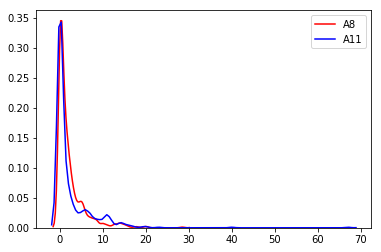

In [105]:
sns.kdeplot(dfa8, color='r');
sns.kdeplot(dfa11, color='b');

In [0]:
stats, pvalue = ttest_ind(dfa8, dfa11)

In [108]:
stats

-0.7874666977959015

In [109]:
pvalue

0.4311443337786607

In [0]:
t_dist = np.random.standard_t(df=100, size=100)

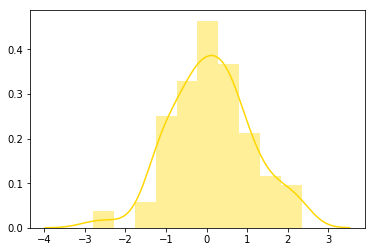

In [128]:
ax = sns.distplot(t_dist, color='gold')

In [0]:
dfa3 = df['A3']
dfa15 = df['A15']

In [114]:
for sample2 in [dfa3, dfa15]:
    print(f"Mean: {sample2.mean()}")
    print(f"Standard Deviation: {sample2.std()}")
    print(f"Variance: {sample2.var()}")
    print("---"*10)

Mean: 4.765631349782292
Standard Deviation: 4.978470362640537
Variance: 24.785167151690203
------------------------------
Mean: 1018.8621190130624
Standard Deviation: 5213.743148827868
Variance: 27183117.621949535
------------------------------


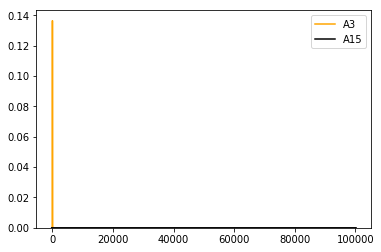

In [129]:
sns.kdeplot(dfa3, color='orange');
sns.kdeplot(dfa15, color='black');

In [133]:
ttest_rel(dfa3, dfa15)

Ttest_relResult(statistic=-5.10610858299884, pvalue=4.2619421268186154e-07)

In [134]:
ct = pd.crosstab(df['A1'], df['A16'], dropna = True)
ct

A16,+,-
A1,,
?,3,9
a,98,112
b,205,262


In [0]:
dfa1 = df['A1']
dfa16 = df['A16']

In [142]:
print(chisquare(df['A8'], axis=None))

Power_divergenceResult(statistic=3467.818311044426, pvalue=0.0)


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

- The last t-test on the two continuous feature i ran with had a completely opposite relation.

- Did not get to complete the relationship for the chi-squared tests.

- The most challeneging part was trying to figure out what to compare the t-tests with as well as the chi-squared tests. and not having anything about the 'Bayeshian Inference'.  Had difficulty trying to understand chi-squared and hypothesis testing.